In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

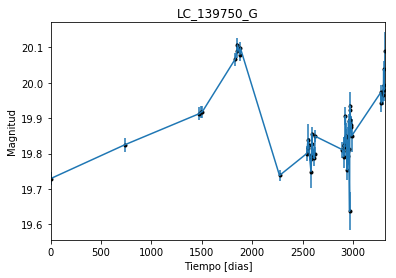

In [2]:
data = np.genfromtxt('LC_139750_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_139750_G')
plt.savefig("LC_139750_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

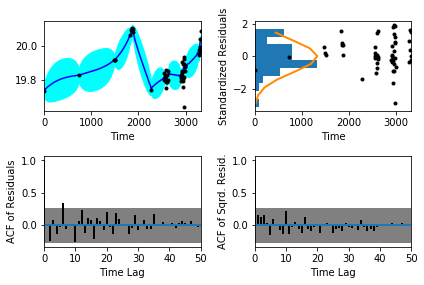

In [5]:
sample.assess_fit()

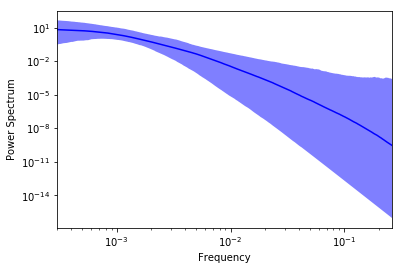

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

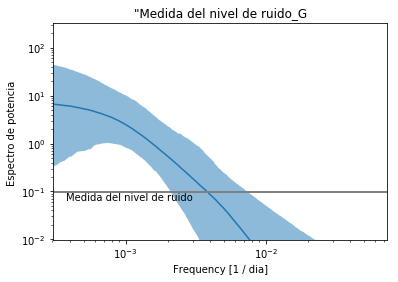

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_139750_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_139750_G')

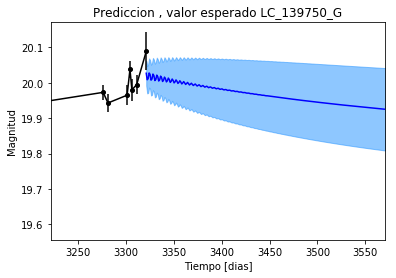

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_139750_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_139750_G')

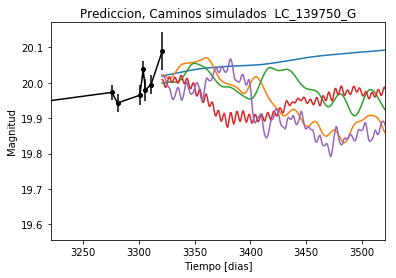

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_139750_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


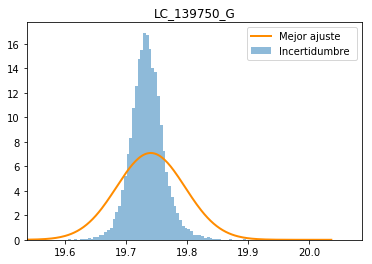

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_139750_G')
plt.savefig("Mejor_ajuste_LC_139750_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_139750_G')

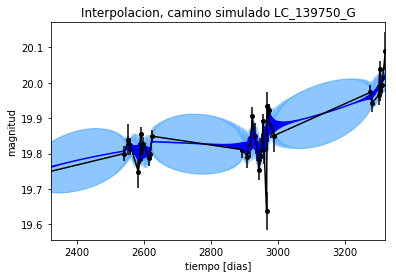

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_G')

Text(0.5,1,'Interpolacion, camino simulado LC_139750_G')

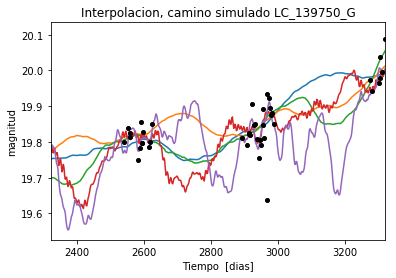

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 646.703008699
Median: 0.00776156926284
Standard deviation: 0.0904278549696
68% credibility interval: [ 0.00075693  0.08338623]
95% credibility interval: [  3.47626320e-04   3.56616064e-01]
99% credibility interval: [  3.05244778e-04   4.82467199e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 431.245933374
Median: 0.00223866167588
Standard deviation: 0.0484856892094
68% credibility interval: [ 0.00048818  0.02991189]
95% credibility interval: [ 0.00032389  0.15792508]
99% credibility interval: [  3.04428935e-04   3.56616064e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 376.343921844
Median: 0.0109188871691
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1141.50486498
Median: 98.7179902652
Standard deviation: 1.61817345754
68% credibility interval: [ 97.06951541  99.85356594]
95% credibility interval: [  94.6146517  101.0324175]
99% credibility interval: [  92.62318348  102.42566793]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 631.733253653
Median: 0.443117947778
Standard deviation: 1.10457086814
68% credibility interval: [ 0.04688226  1.96467005]
95% credibility interval: [ 0.01330411  3.91185339]
99% credibility interval: [ 0.00946582  5.05077055]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 563.341979957
Median: 0.183625367232
Standard deviation: 2.51285991513
68% credibility interval: [ 0.01071666  2.6230714 ]
95% credibility interval: [  6.34474538e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4364.72619034
Median: 5.09609883794e-18
Standard deviation: 2.11723241268e+121
68% credibility interval: [  6.04300181e-41   5.12888642e+23]
95% credibility interval: [  3.00232900e-68   7.56260327e+79]
99% credibility interval: [  1.14506460e-072   1.31687149e+120]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2810.17424567
Median: 19.8727223355
Standard deviation: 0.0643306274718
68% credibility interval: [ 19.81912824  19.92148697]
95% credibility interval: [ 19.74087273  19.99598404]
99% credibility interval: [ 19.65578886  20.08002444]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 294.446172321
Median: 0.0218450823618
Standard deviation: 0.13156774161
68% credibility interval: [ 0.          0.22866583]
95% credibility interval: [ 0.          0.46103194]
99% credibility interval: [ 0.         0.5126531]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 294.446172321
Median: 0.0218450823618
Standard deviation: 0.13156774161
68% credibility interval: [ 0.          0.22866583]
95% credibility interval: [ 0.          0.46103194]
99% credibility interval: [ 0.         0.5126531]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 798.798589677
Median: 0.0
Standard deviation: 0.000509738511459
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1141.50486498
Median: 98.7179902652
Standard deviation: 1.61817345754
68% credibility interval: [ 97.06951541  99.85356594]
95% credibility interval: [  94.6146517  101.0324175]
99% credibility interval: [  92.62318348  102.42566793]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1467.73339794
Median: 0.0161395311429
Standard deviation: 0.0234484628302
68% credibility interval: [ 0.00959336  0.03153507]
95% credibility interval: [ 0.00635294  0.07304853]
99% credibility interval: [ 0.00470875  0.15866139]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1112.27648781
Median: 1.54043633873
Standard deviation: 0.23186036852
68% credibility interval: [ 1.28767062  1.7733802 ]
95% credibility interval: [ 1.06835106  1.94299559]
99% credibility interval: [ 0.93221805  1.98253754]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 558.91971957
Median: 1.53999685612e-05
Standard deviation: 0.018346185276
68% credibility interval: [  3.68545192e-27   1.56065988e-03]
95% credibility interval: [  8.22692852e-83   5.26100109e-02]
99% credibility interval: [  1.09967710e-124   1.39697460e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 646.703008699
Median: (-0.0487673779529+0j)
Standard deviation: 1.00309371117
68% credibility interval: [-0.52393114-2.2566398j  -0.00475593-2.59487023j]
95% credibility interval: [ -2.24068481e+00-1.67669451j  -2.18420058e-03-0.00269369j]
99% credibility interval: [ -3.03143082e+00+0.j          -1.91790950e-03-0.00455297j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 431.245933374
Median: (-0.0140659261496+1.27504646965j)
Standard deviation: 0.881012208341
68% credibility interval: [-0.18794193+2.03627466j -0.00306735+0.j        ]
95% credibility interval: [-0.99227252+0.72392182j -0.00203504+0.j        ]
99% credibility interval: [ -2.24068481e+00+1.67669451j  -1.91278341e-03+0.00256498j]
Posterior summary for par